You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here, https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df.rename({"Height":"height", "Weight":"weight"}, axis=1, inplace=True)
df

,Gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df.height = df.height * 2.54

In [5]:
df

,Gender,height,weight
0,Male,187.571423,241.893563
1,Male,174.706036,162.310473
2,Male,188.239668,212.740856
3,Male,182.196685,220.042470
4,Male,177.499761,206.349801
...,...,...,...
9995,Female,168.078536,136.777454
9996,Female,170.350573,170.867906
9997,Female,162.224700,128.475319
9998,Female,175.346978,163.852461


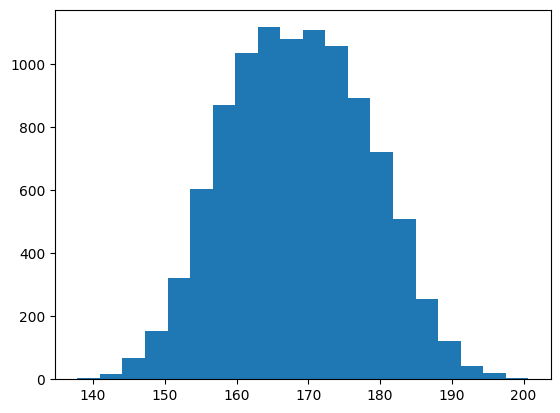

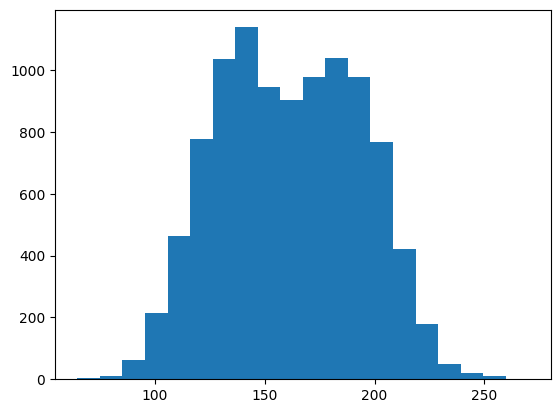

In [6]:
plt.hist(df.height, bins=20)
plt.show()
plt.hist(df.weight, bins=20)
plt.show()

In [7]:
IQR_height = df.height.quantile(.75) -  df.height.quantile(.25)
upper_limit_height = df.height.quantile(.75) + 1.5 * IQR_height
lower_limit_height = df.height.quantile(.25) - 1.5 * IQR_height
IQR_height, upper_limit_height, lower_limit_height

(14.398348763864021, 197.3001479319562, 139.7067528765001)

In [8]:
df.height.describe()

count    10000.000000
mean       168.573602
std          9.772721
min        137.828359
25%        161.304276
50%        168.447898
75%        175.702625
max        200.656806
Name: height, dtype: float64

In [9]:
height_mask = (df.height>upper_limit_height) | (df.height<lower_limit_height)
df[height_mask]

,Gender,height,weight
994,Male,198.363503,255.690835
1317,Male,199.293614,227.342565
2014,Male,200.656806,269.989699
3285,Male,199.461654,253.889004
3757,Male,199.698290,245.733783
6624,Female,138.726819,71.393749
7294,Female,139.379268,78.606670
9285,Female,137.828359,64.700127


In [10]:
IQR_weight = df.weight.quantile(.75) -  df.weight.quantile(.25)
upper_limit_weight = df.weight.quantile(.75) + 1.5 * IQR_weight
lower_limit_weight = df.weight.quantile(.25) - 1.5 * IQR_weight
IQR_weight, upper_limit_weight, lower_limit_weight

(51.35147356318197, 264.19673521345646, 58.79084096072856)

In [11]:
df.weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: weight, dtype: float64

In [12]:
weight_mask = (df.weight>upper_limit_weight) | (df.weight<lower_limit_weight)
df[weight_mask]

,Gender,height,weight
2014,Male,200.656806,269.989699
